# **Q(1) Delivery_time -> Predict delivery time using sorting time**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import warnings

In [2]:
Del=pd.read_csv("/content/delivery_time.csv")

In [3]:
Del

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
Del.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
Del.columns=['delivery_time','sorting_time']

In [6]:
#checking missing value
Del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


NO MISSING VALUE

In [7]:
#checking duplicate value
Del[Del.duplicated()]

,delivery_time,sorting_time


NO DUPLICATED VALUE

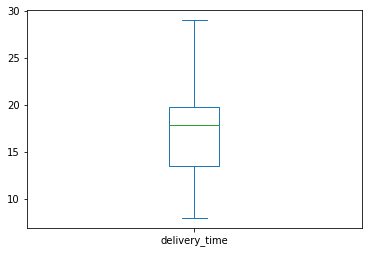

In [8]:
#checking outliers
Del.delivery_time.plot(kind='box')

THERE ARE NO OUTLIERS

# **APPLYING TRANSFORMATIONS**

In [10]:
Del['st_sq']=Del.sorting_time**2
Del['st_sqrt']=Del.sorting_time**0.5
Del['st_log']=np.log(Del.sorting_time)
Del['st_sqrt4']=Del.sorting_time**0.4 

In [11]:
Del

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
0,21.00,10,100,3.162278,2.302585,2.511886
1,13.50,4,16,2.000000,1.386294,1.741101
2,19.75,6,36,2.449490,1.791759,2.047673
3,24.00,9,81,3.000000,2.197225,2.408225
4,29.00,10,100,3.162278,2.302585,2.511886
5,15.35,6,36,2.449490,1.791759,2.047673
6,19.00,7,49,2.645751,1.945910,2.177906
7,9.50,3,9,1.732051,1.098612,1.551846
8,17.90,10,100,3.162278,2.302585,2.511886
9,18.75,9,81,3.000000,2.197225,2.408225


# **CORRELATION ANALYSIS**

In [13]:
Del.corr()

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
delivery_time,1.000000,0.825997,0.793906,0.834150,0.833933,0.834847
sorting_time,0.825997,1.000000,0.983967,0.994704,0.977447,0.992266
st_sq,0.793906,0.983967,1.000000,0.960816,0.925659,0.954766
st_sqrt,0.834150,0.994704,0.960816,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.925659,0.993904,1.000000,0.996045
st_sqrt4,0.834847,0.992266,0.954766,0.999768,0.996045,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


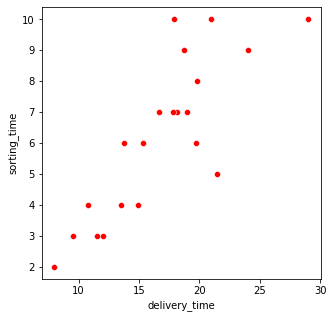

In [14]:
plt.figure(figsize =(5,5))
sns.scatterplot(Del['delivery_time'],Del['sorting_time'],color='Red')

Correlation between delivery_time and sorting_time seems to be low

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


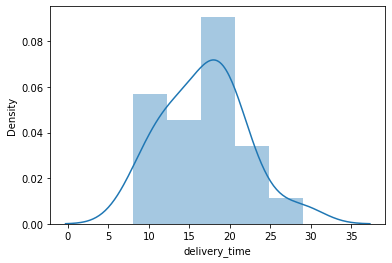

In [15]:
 sns.distplot(Del['delivery_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


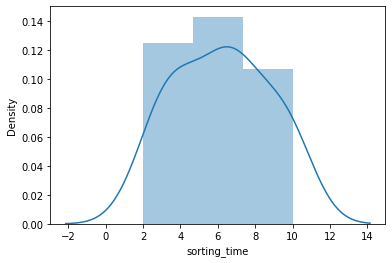

In [16]:
 sns.distplot(Del['sorting_time'])

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <a list of 6 Patch objects>)

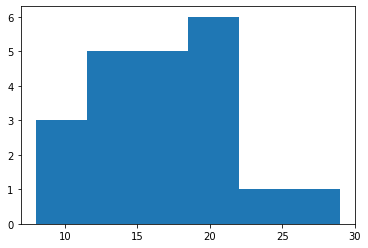

In [17]:
plt.hist(Del['delivery_time'],bins=6)

(array([4., 3., 1., 7., 1., 5.]),
 array([ 2.        ,  3.33333333,  4.66666667,  6.        ,  7.33333333,
         8.66666667, 10.        ]),
 <a list of 6 Patch objects>)

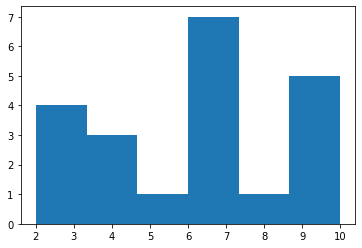

In [18]:
plt.hist(Del['sorting_time'],bins=6)

# **MODEL BUILDING**

In [19]:
model1=smf.ols('delivery_time~sorting_time',data=Del).fit()
model1_sq=smf.ols('delivery_time~st_sq',data=Del).fit()
model1_sqrt=smf.ols('delivery_time~st_sqrt',data=Del).fit()
model1_log=smf.ols('delivery_time~st_log',data=Del).fit()
model1_sqrt4=smf.ols('delivery_time~st_sqrt4',data=Del).fit()

# **MODEL TESTING**

In [21]:
print(model1.params)
print(model1_sq.params)
print(model1_sqrt.params)
print(model1_log.params)
print(model1_sqrt4.params)

Intercept       6.582734
sorting_time    1.649020
dtype: float64
Intercept    11.237205
st_sq         0.124870
dtype: float64
Intercept   -2.518837
st_sqrt      7.936591
dtype: float64
Intercept    1.159684
st_log       9.043413
dtype: float64
Intercept    -7.050883
st_sqrt4     11.751321
dtype: float64


In [22]:
print(model1.tvalues)
print(model1_sq.tvalues)
print(model1_sqrt.tvalues)
print(model1_log.tvalues)
print(model1_sqrt4.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept    9.398601
st_sq        5.691330
dtype: float64
Intercept   -0.840911
st_sqrt      6.592434
dtype: float64
Intercept    0.472460
st_log       6.586789
dtype: float64
Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64


In [23]:
print(model1.tvalues)
print(model1_sq.tvalues)
print(model1_sqrt.tvalues)
print(model1_log.tvalues)
print(model1_sqrt4.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64
Intercept    9.398601
st_sq        5.691330
dtype: float64
Intercept   -0.840911
st_sqrt      6.592434
dtype: float64
Intercept    0.472460
st_log       6.586789
dtype: float64
Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64


In [24]:
print(model1.pvalues)
print(model1_sq.pvalues)
print(model1_sqrt.pvalues)
print(model1_log.pvalues)
print(model1_sqrt4.pvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64
Intercept    1.415704e-08
st_sq        1.739194e-05
dtype: float64
Intercept    0.410857
st_sqrt      0.000003
dtype: float64
Intercept    0.641980
st_log       0.000003
dtype: float64
Intercept    0.069169
st_sqrt4     0.000003
dtype: float64


In [25]:
print(model1.rsquared)
print(model1_sq.rsquared)
print(model1_sqrt.rsquared)
print(model1_log.rsquared)
print(model1_sqrt4.rsquared)

0.6822714748417231
0.6302871815826637
0.695806227630867
0.6954434611324223
0.6969691412160728


In [26]:
print(model1.rsquared_adj)
print(model1_sq.rsquared_adj)
print(model1_sqrt.rsquared_adj)
print(model1_log.rsquared_adj)
print(model1_sqrt4.rsquared_adj)

0.6655489208860244
0.6108286121922777
0.6797960290851232
0.6794141696130761
0.6810201486484977


# **MODEL PREDICTION**

In [27]:
Del['predicted']=model1_sqrt4.fittedvalues
Del

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4,predicted
0,21.00,10,100,3.162278,2.302585,2.511886,22.467100
1,13.50,4,16,2.000000,1.386294,1.741101,13.409355
2,19.75,6,36,2.449490,1.791759,2.047673,17.011974
3,24.00,9,81,3.000000,2.197225,2.408225,21.248938
4,29.00,10,100,3.162278,2.302585,2.511886,22.467100
5,15.35,6,36,2.449490,1.791759,2.047673,17.011974
6,19.00,7,49,2.645751,1.945910,2.177906,18.542394
7,9.50,3,9,1.732051,1.098612,1.551846,11.185352
8,17.90,10,100,3.162278,2.302585,2.511886,22.467100
9,18.75,9,81,3.000000,2.197225,2.408225,21.248938


In [28]:
new=pd.DataFrame({'sorting_time':[7,6.5]})
new['st_sqrt4']=new.sorting_time**0.4
new

,sorting_time,st_sqrt4
0,7.0,2.177906
1,6.5,2.114294


In [29]:
new['predicted']=model1_sqrt4.predict(new)
new

,sorting_time,st_sqrt4,predicted
0,7.0,2.177906,18.542394
1,6.5,2.114294,17.794862


# **Q(2) Salary_hike -> Build a prediction model for Salary_hike**

In [32]:
salary_hike=pd.read_csv("/content/Salary_Data.csv")

In [33]:
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [34]:
#Checking missing value
salary_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


NO MISSING VALUE

In [35]:
#checking duplicate value
salary_hike[salary_hike.duplicated()] 

,YearsExperience,Salary


NO DUPLICATED VALUES

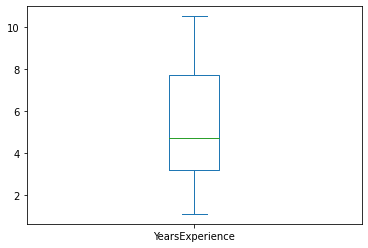

In [36]:
#Checking outlier
salary_hike.YearsExperience.plot(kind='box')

THERE ARE NO OUTLIERS IN THE DATA

# **CHECKING CORRELATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


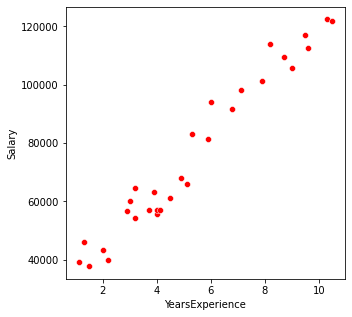

In [56]:
plt.figure(figsize=(5,5))
sns.scatterplot(salary_hike['YearsExperience'],salary_hike['Salary'],color='Red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,predicted
YearsExperience,1.000000,0.978242,0.977067,0.989850,0.953797,1.000000
Salary,0.978242,1.000000,0.956724,0.964884,0.924061,0.978242
ye_sq,0.977067,0.956724,1.000000,0.937950,0.872019,0.977067
ye_sqrt,0.989850,0.964884,0.937950,1.000000,0.986620,0.989850
ye_log,0.953797,0.924061,0.872019,0.986620,1.000000,0.953797
predicted,1.000000,0.978242,0.977067,0.989850,0.953797,1.000000


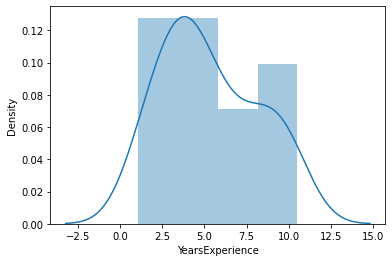

In [57]:
sns.distplot(salary_hike['YearsExperience'])
salary_hike.corr()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


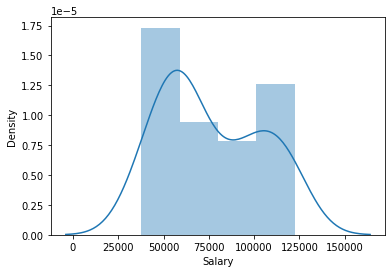

In [58]:
sns.distplot(salary_hike['Salary'])

# Years and salary seems to be highly correlated

TRYING DIFFERENT TRANSFORMATIONS

In [59]:
import numpy as np
salary_hike['ye_sq']=salary_hike.YearsExperience**2
salary_hike['ye_sqrt']=salary_hike.YearsExperience**0.5
salary_hike['ye_log']=np.log(salary_hike.YearsExperience)

In [60]:
salary_hike.corr()

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,predicted
YearsExperience,1.000000,0.978242,0.977067,0.989850,0.953797,1.000000
Salary,0.978242,1.000000,0.956724,0.964884,0.924061,0.978242
ye_sq,0.977067,0.956724,1.000000,0.937950,0.872019,0.977067
ye_sqrt,0.989850,0.964884,0.937950,1.000000,0.986620,0.989850
ye_log,0.953797,0.924061,0.872019,0.986620,1.000000,0.953797
predicted,1.000000,0.978242,0.977067,0.989850,0.953797,1.000000


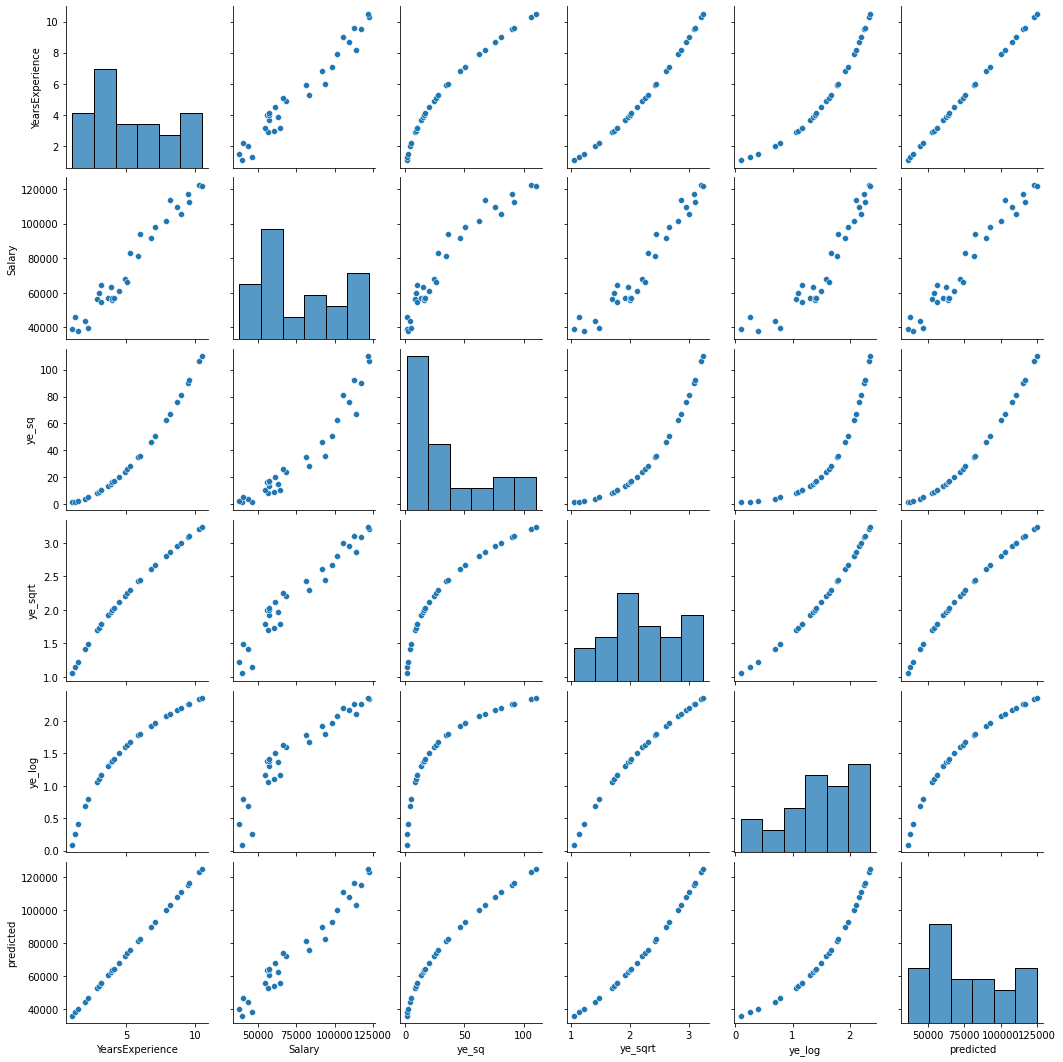

In [61]:
sns.pairplot(salary_hike)

# **MODEL MAKING**

In [62]:
model2=smf.ols("Salary~YearsExperience",data=salary_hike).fit()
model2_sqrt=smf.ols('Salary~ye_sqrt',data=salary_hike).fit()
model_sq=smf.ols('Salary~ye_sq',data=salary_hike).fit()

In [63]:
print(model2.rsquared,model2_sqrt.rsquared,model_sq.rsquared)

0.9569566641435086 0.9310009544993526 0.9153198857852564


# Untransformed data has higher rsquared value even though others had similar or higher correlation

R SQUARED VALUE IS ABOVE 95%

In [64]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
model2.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

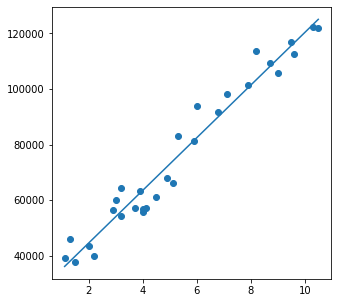

In [66]:
fig=plt.figure(figsize=(5,5))
plt.plot(salary_hike["YearsExperience"],model2.fittedvalues)
plt.scatter(salary_hike["YearsExperience"],salary_hike.Salary)

In [67]:
model2.resid
model2.rsquared
model2.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [68]:
salary_hike["predicted"]=model2.fittedvalues

In [69]:
salary_hike

,YearsExperience,Salary,ye_sq,ye_sqrt,ye_log,predicted
0,1.1,39343.0,1.21,1.048809,0.095310,36187.158752
1,1.3,46205.0,1.69,1.140175,0.262364,38077.151217
2,1.5,37731.0,2.25,1.224745,0.405465,39967.143681
3,2.0,43525.0,4.00,1.414214,0.693147,44692.124842
4,2.2,39891.0,4.84,1.483240,0.788457,46582.117306
5,2.9,56642.0,8.41,1.702939,1.064711,53197.090931
6,3.0,60150.0,9.00,1.732051,1.098612,54142.087163
7,3.2,54445.0,10.24,1.788854,1.163151,56032.079627
8,3.2,64445.0,10.24,1.788854,1.163151,56032.079627
9,3.7,57189.0,13.69,1.923538,1.308333,60757.060788


### **PREDICTING FOR A NEW DATA**

In [70]:
new=pd.DataFrame({'YearsExperience':[3,4.5]})

In [71]:
model2.predict(new)

0    54142.087163
1    68317.030645
dtype: float64

In [72]:
new['predict']=model2.predict(new)

In [73]:
new

,YearsExperience,predict
0,3.0,54142.087163
1,4.5,68317.030645


# ***THE SALARY DATA (MODEL2) HAS THE HIGHEST RSQUARED VALUES SO WE CONCLUDE IT AS THE BEST MODEL***